In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

train = pd.read_csv("./info/train.csv")
test =  pd.read_csv("./info/test.csv")

df = pd.concat([train, test], axis=0)


def analyze_numeric_features(df):
    """
    Realiza un análisis completo de las variables numéricas
    """
    # Identificar variables numéricas
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Configuración del estilo de visualización
    plt.style.use('classic')  # Cambiado a un estilo válido
    
    # 1. Análisis de Distribuciones
    def plot_distributions(df, features, rows, cols):
        fig = plt.figure(figsize=(15, 4*rows))
        for idx, feature in enumerate(features, 1):
            ax = plt.subplot(rows, cols, idx)
            # Histograma con KDE
            sns.histplot(data=df, x=feature, kde=True, color='skyblue')
            plt.title(f'Distribución de {feature}', pad=10)
            # Añadir skewness y kurtosis
            skewness = df[feature].skew()
            kurtosis = df[feature].kurtosis()
            plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                    transform=ax.transAxes, ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
            plt.grid(True, alpha=0.3)
        plt.tight_layout()
        return fig
    
    # 2. Matriz de correlaciones
    def plot_correlation_matrix(df, features):
        plt.figure(figsize=(12, 8))
        correlation_matrix = df[features].corr()
        mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Máscara para triángulo superior
        sns.heatmap(correlation_matrix, 
                    mask=mask,
                    annot=True, 
                    cmap='RdBu_r',  # Cambiado a un esquema de color más claro
                    center=0,
                    fmt='.2f', 
                    square=True,
                    linewidths=0.5)
        plt.title('Matriz de Correlaciones - Variables Numéricas', pad=20)
        return correlation_matrix
    
    # 3. Análisis de correlación con SalePrice
    def analyze_price_correlations(df, features):
        correlations = df[features].corrwith(df['SalePrice']).sort_values(ascending=False)
        plt.figure(figsize=(12, 6))
        ax = correlations.plot(kind='bar', color='lightcoral')
        plt.title('Correlación con SalePrice', pad=15)
        plt.xlabel('Variables')
        plt.ylabel('Coeficiente de Correlación')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', alpha=0.3)
        
        # Añadir valores sobre las barras
        for i, v in enumerate(correlations):
            ax.text(i, v + (0.01 if v >= 0 else -0.01), 
                   f'{v:.2f}', 
                   ha='center',
                   va='bottom' if v >= 0 else 'top')
        
        plt.tight_layout()
        return correlations
    
    # 4. Scatterplots para las variables más correlacionadas
    def plot_top_correlations(df, correlations, n_top=5):
        top_features = correlations.abs().nlargest(n_top).index
        fig, axes = plt.subplots(n_top, 1, figsize=(10, 4*n_top))
        
        for idx, feature in enumerate(top_features):
            sns.regplot(data=df, 
                       x=feature, 
                       y='SalePrice', 
                       ax=axes[idx],
                       scatter_kws={'alpha':0.5, 'color':'blue'},
                       line_kws={'color': 'red'})
            
            axes[idx].set_title(f'SalePrice vs {feature}')
            axes[idx].grid(True, alpha=0.3)
            
            # Añadir coeficiente de correlación
            corr = df[feature].corr(df['SalePrice'])
            axes[idx].text(0.05, 0.95, f'Correlación: {corr:.2f}',
                         transform=axes[idx].transAxes,
                         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
        
        plt.tight_layout()
    
    # Ejecutar análisis
    features = [col for col in numeric_features if col != 'SalePrice']
    n_features = len(features)
    rows = (n_features + 2) // 3  # 3 columnas
    
    # Generar visualizaciones
    dist_fig = plot_distributions(df, features, rows, 3)
    plt.figure()  # Nueva figura
    corr_matrix = plot_correlation_matrix(df, numeric_features)
    plt.figure()  # Nueva figura
    price_corr = analyze_price_correlations(df, features)
    plt.figure()  # Nueva figura
    plot_top_correlations(df, price_corr)
    
    return {
        'correlations_with_price': price_corr,
        'correlation_matrix': corr_matrix,
    }

# Función para generar reporte estadístico
def generate_numeric_report(df):
    """
    Genera un reporte estadístico detallado de las variables numéricas
    """
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    stats_report = pd.DataFrame({
        'mean': df[numeric_features].mean(),
        'median': df[numeric_features].median(),
        'std': df[numeric_features].std(),
        'min': df[numeric_features].min(),
        'max': df[numeric_features].max(),
        'skew': df[numeric_features].skew(),
        'kurtosis': df[numeric_features].kurtosis(),
        'missing': df[numeric_features].isnull().sum(),
        'missing_pct': (df[numeric_features].isnull().sum() / len(df)) * 100
    })
    return stats_report.round(2)

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: cannot reindex on an axis with duplicate labels

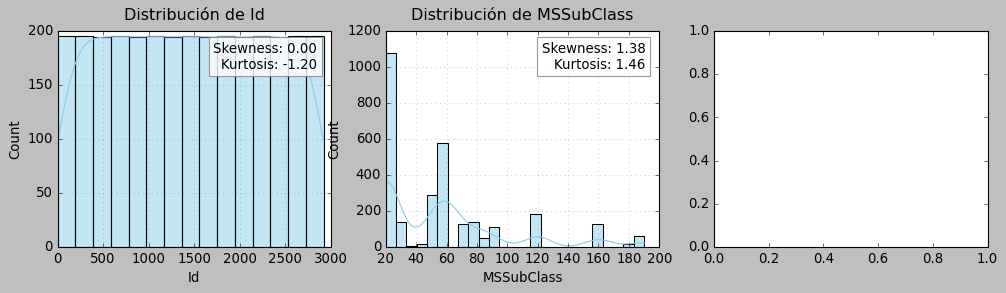

In [20]:
# Asumiendo que tienes tu DataFrame cargado como 'df'
analysis_results = analyze_numeric_features(df)
stats_report = generate_numeric_report(df)

# Ver las correlaciones con precio
print("\nCorrelaciones con SalePrice:")
print(analysis_results['correlations_with_price'])

# Ver el reporte estadístico completo
print("\nReporte Estadístico:")
print(stats_report)